### Import necessary libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

c:\Users\User\Desktop\Đại học\My Own Projects\MNIST with NeuralNetwork\ml-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\AppData\Local\Temp\ipykernel_17660\3702787581.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Load dataset

In [2]:
mnist_train, mnist_val, mnist_test = tfds.load("mnist", 
        split = ["train[:80%]", "train[80%:]", "test"], 
        as_supervised=True)

print("Train set size:", tf.data.experimental.cardinality(mnist_train).numpy())
print("Validation set size:", tf.data.experimental.cardinality(mnist_val).numpy())
print("Test set size:", tf.data.experimental.cardinality(mnist_test).numpy())

Train set size: 48000
Validation set size: 12000
Test set size: 10000


We will take a look at what these images look like

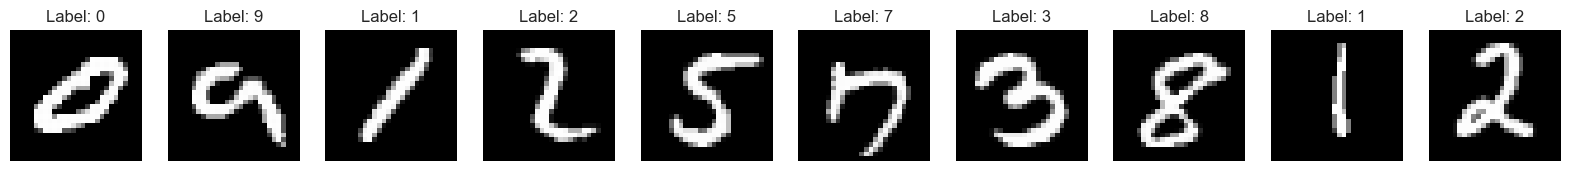

In [3]:
shuffled_train = mnist_train.shuffle(buffer_size=10000)
plt.figure(figsize=(10 * 2, 2))
for i, (image, label) in enumerate(shuffled_train.take(10)):
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.show()

We check the shape of each image

In [4]:
for image, label in mnist_train.take(1):
    print("Image shape:", image.shape)

Image shape: (28, 28, 1)


Distribution of train_data

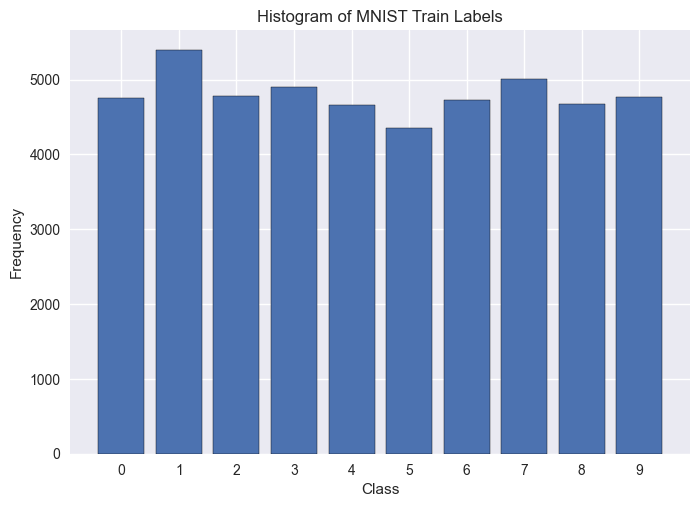

In [5]:
# Collect all labels into a list
labels = [label.numpy() for _, label in mnist_train]

# Plot histogram
plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Train Labels")
plt.grid(True)
plt.show()

Distribution of val_data

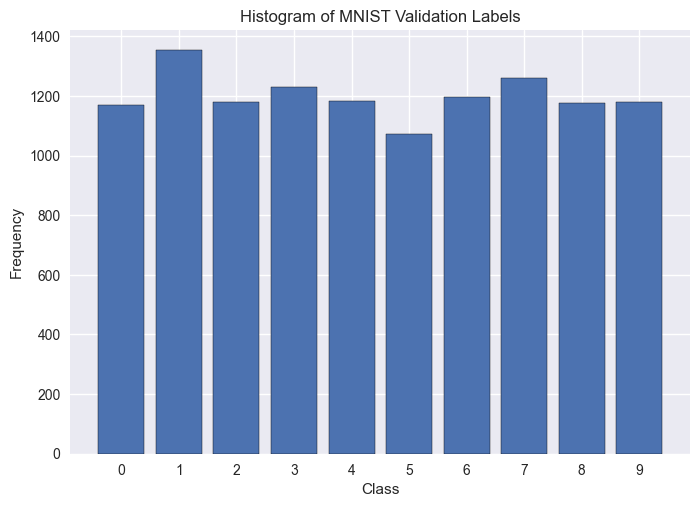

In [6]:
# Collect all labels into a list
labels = [label.numpy() for _, label in mnist_val]

# Plot histogram
plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Validation Labels")
plt.grid(True)
plt.show()

Distribution of test_data

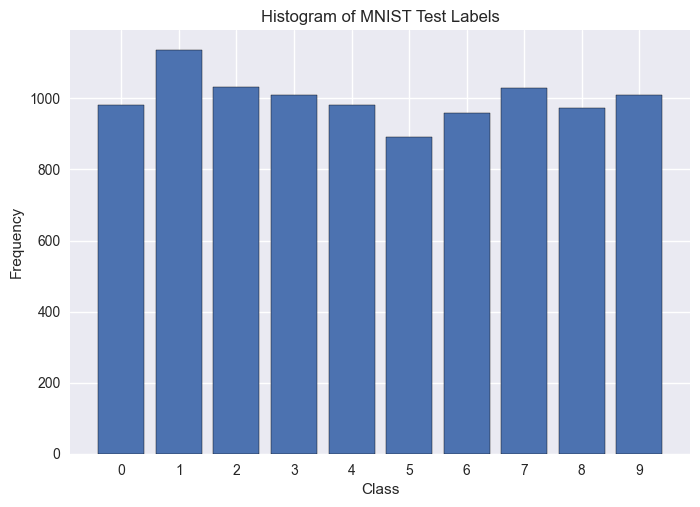

In [7]:
# Collect all labels into a list
labels = [label.numpy() for _, label in mnist_test]

# Plot histogram
plt.hist(labels, bins=np.arange(11) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Test Labels")
plt.grid(True)
plt.show()

Batching the data

In [8]:
mnist_train = mnist_train.shuffle(1000).batch(32)
mnist_val = mnist_val.batch(32)
mnist_test = mnist_test.batch(32)

### Design network architecture

(784 neurons)--sigmoid->(40 neurons)--ReLU->(20 neurons)--softmax->(10 neurons output)

In [17]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),          # Flatten 28x28 image to 784 vector
    Dense(40, activation='relu'),              # Hidden layer with 40 neurons and ReLU activation
    Dropout(0.1),
    Dense(20, activation='relu'),              # Hidden layer with 20 neurons and ReLU activation
    Dropout(0.1),
    Dense(10, activation='softmax')            # Output layer with 10 neurons (for 10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 40)                31400     
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
Total params: 32430 (126.68 KB)
Trainable params: 3243

### Train model

In [18]:
history = model.fit(
    mnist_train,
    epochs=40,
    validation_data=mnist_val
)

Epoch 1/40
1500/1500 [==============================] - 6s 4ms/step - loss: 2.9734 - accuracy: 0.2169 - val_loss: 1.9049 - val_accuracy: 0.2725
Epoch 2/40
1500/1500 [==============================] - 5s 3ms/step - loss: 1.7002 - accuracy: 0.3891 - val_loss: 1.3304 - val_accuracy: 0.5133
Epoch 3/40
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3101 - accuracy: 0.5309 - val_loss: 1.0031 - val_accuracy: 0.6335
Epoch 4/40
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0224 - accuracy: 0.6339 - val_loss: 0.7321 - val_accuracy: 0.7446
Epoch 5/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7463 - accuracy: 0.7619 - val_loss: 0.4404 - val_accuracy: 0.8774
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5118 - accuracy: 0.8432 - val_loss: 0.3236 - val_accuracy: 0.9153
Epoch 7/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4330 - accuracy: 0.8674 - val_loss: 0.3002 - val_accuracy:

We see the Learning Curve

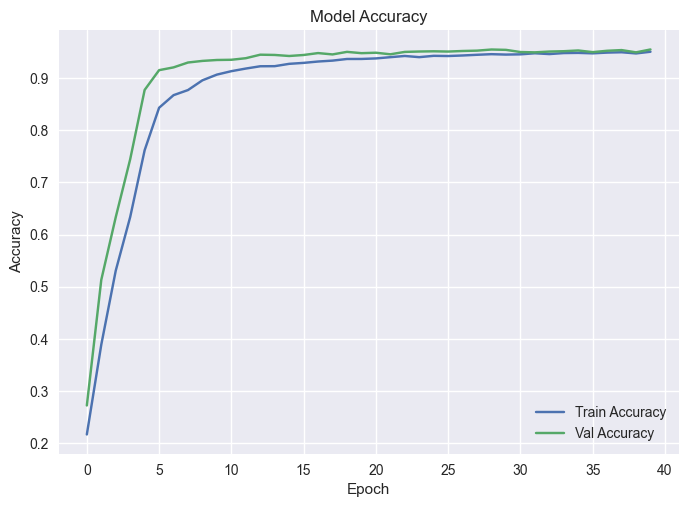

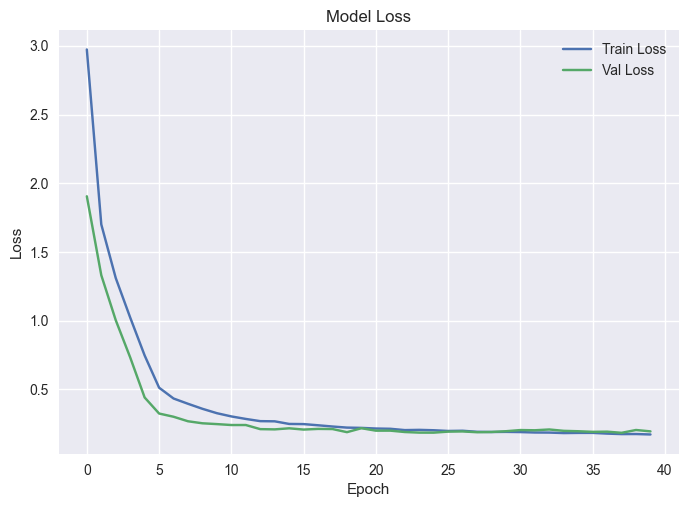

In [19]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Evaluate model

In [20]:
test_loss, test_acc = model.evaluate(mnist_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1817 - accuracy: 0.9578
Test accuracy: 0.9578


Confusion matrix

In [21]:
# Initialize lists to hold true and predicted labels
y_true = []
y_pred = []

# Iterate through the test dataset
for image, label in mnist_test:
    y_true.extend(label.numpy())  # True labels
    predictions = model.predict(image, verbose=False)  # Predict the class probabilities
    y_pred.extend(np.argmax(predictions, axis=1))  # Get predicted class (index with max prob)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

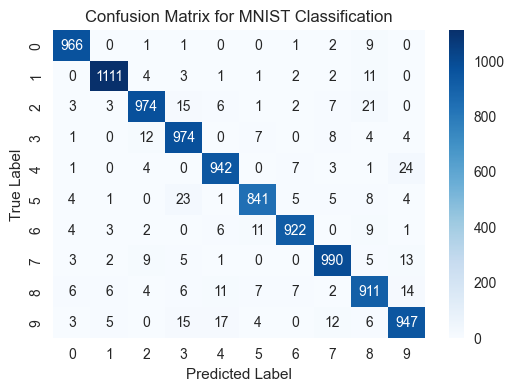

In [22]:
# Create confusion matrix
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=10).numpy()

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))

# Add titles and labels
plt.title("Confusion Matrix for MNIST Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show plot
plt.show()